In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import torch
import numpy as np
import libmr
from vast.DistributionModels import weibull

In [3]:
training_data = np.random.randn(5, 100)
testing_data = np.arange(-5,10,0.01)
testing_data = np.tile(testing_data, (5,1))

In [4]:
tailsize = 20

In [5]:
libmr_predictions = []
for i in range(training_data.shape[0]):
    mr = libmr.MR()
    mr.fit_high(training_data[i,:], tailsize)
    libmr_predictions.append(mr.w_score_vector(testing_data[i,:]))

In [6]:
mr = weibull.weibull()
mr.FitHigh(torch.tensor(training_data), tailsize)
vast_predictions = mr.wscore(torch.tensor(testing_data).T)

In [7]:
vast_predictions.shape

torch.Size([1500, 5])

Libmr == vast True
Libmr == vast True
Libmr == vast True
Libmr == vast True
Libmr == vast True


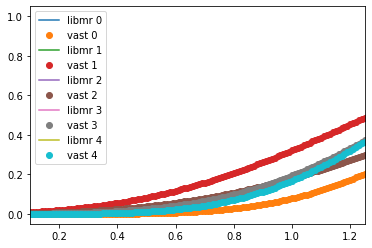

In [8]:
for i in range(testing_data.shape[0]):
    print("Libmr == vast", torch.allclose(torch.tensor(libmr_predictions[i]),vast_predictions[:,i]))
    plt.plot(testing_data[i,:], libmr_predictions[i], label=f'libmr {i}')
    plt.plot(testing_data[i,:], vast_predictions[:,i], label=f'vast {i}', linestyle = 'None', marker='o')
plt.xlim([0.1, 1.25])
plt.legend()
plt.show()